In [1]:
import sqlite3
import pandas  as pd
import matplotlib.pyplot as plt
import numpy   as np
import seaborn as sns 

plt.style.use('dark_background')

index_data - current information about objects

parcel_aggr - aggregated information about shipments (for April 2024)

The first table

parcel_id - Unique identifier of the shipment

accept_date - Date of accepting the shipment

Index - Branch index where the shipment was accepted

mass - Mass of the shipment in grams

price - Paid tariff for shipping the shipment in kopecks

client_type - Sender type (Individual/Legal entity)

The second table

index_data - Branch index

area - Region where the branch is located

population - Population of the locality where the branch is located, in thousands of people








In [2]:
sqlite3.sqlite_version

'3.41.2'

# data upload

If we generate unique IDs for something, can we do it using 'range()'

In [3]:
parcel_aggr = pd.DataFrame({'parcel_id':range(100)})

We'll generate our dates for April using the `date_range()` function in the same way.

In [4]:
parcel_aggr['accept_date'] = pd.Series(pd.date_range(start='2024-04-01', end='2024-04-30')).sample(100,replace=True,random_state=42).values

In [5]:
parcel_aggr

,parcel_id,accept_date
0,0,2024-04-07
1,1,2024-04-20
2,2,2024-04-29
3,3,2024-04-15
4,4,2024-04-11
...,...,...
95,95,2024-04-29
96,96,2024-04-18
97,97,2024-04-26
98,98,2024-04-12


The branch index where the shipment was accepted. Since there are no unique users anymore, let's do it through sampling.

In [6]:
random_state=42
parcel_aggr['index_id'] = pd.Series(range(10)).sample(100,replace=True).values

In [19]:
#parcel_aggr.drop(columns = ('index'),inplace=True)

Next, we'll simply generate the weight of the parcel using a normal distribution. First, we'll use the mean for the sample, then the standard deviation.

Additionally, we'll 'fix' the random seed in NumPy.

The number 42 is associated with the cult science fiction work by Douglas Adams called "The Hitchhiker's Guide to the Galaxy." In this book, the number 42 represents the answer to the question about life, the universe, and everything. Here's a quote from the book:

"The answer to the ultimate question of life, the universe, and everything is 42."

This answer, although seemingly meaningless, has become the subject of numerous jokes and interpretations in culture, including the fields of programming and computer science. Therefore, in programming, the number 42 is sometimes used as a humorous reference value, especially in cases where an arbitrary value is needed to illustrate code or an example.








Let's round our mass to the nearest whole number.

In [20]:
np.random.seed(42)
parcel_aggr['mass'] = np.round(np.abs(pd.Series(np.random.normal(10000,20000,size=100)).values)).astype('int')

In [21]:
parcel_aggr

,parcel_id,accept_date,index_id,mass
0,0,2024-04-07,7,19934
1,1,2024-04-20,7,7235
2,2,2024-04-29,7,22954
3,3,2024-04-15,5,40461
4,4,2024-04-11,2,5317
...,...,...,...,...
95,95,2024-04-29,9,19270
96,96,2024-04-18,0,15922
97,97,2024-04-26,1,15221
98,98,2024-04-12,3,10102


On the histogram, we can see that the data looks relatively realistic because we took the absolute value, and parcels with smaller masses occur much more frequently than those with larger masses.

<Axes: >

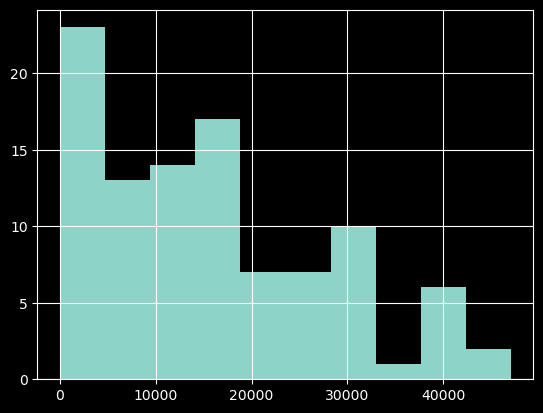

In [22]:
parcel_aggr.mass.hist()

Let's create a histogram for the price using the same method.

In [23]:
np.random.seed(42)
parcel_aggr['price'] = np.round(np.abs(pd.Series(np.random.normal(10000,50000,size=100)).values)).astype('int')

<Axes: >

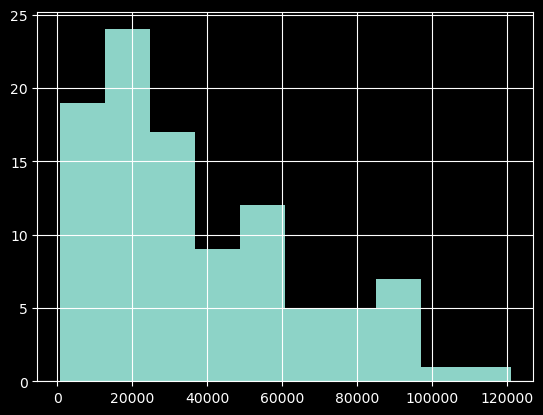

In [24]:
parcel_aggr.price.hist()

In [25]:
np.random.seed(42)
parcel_aggr['client_type'] = np.random.choice(['individual','entity'], size=100)

In [26]:
index_data = pd.DataFrame(parcel_aggr['index_id'].sample(10,replace = True,random_state=42).values)

In [27]:
index_data.rename(columns = {0:'index_id'},inplace=True)

Next, we'll create a new table.

In [28]:
index_data

,index_id
0,8
1,0
2,4
3,1
4,8
5,4
6,9
7,2
8,5
9,5


Let's add major cities to the data.

In [29]:
index_data['area'] = pd.Series(['London',
'New York City',
'Paris',
'Tokyo',
'Sydney',
'Rome',
'Beijing',
'Kyiv',
'Cairo',
'Rio de Janeiro']).values

In [30]:
index_data

,index_id,area
0,8,London
1,0,New York City
2,4,Paris
3,1,Tokyo
4,8,Sydney
5,4,Rome
6,9,Beijing
7,2,Kyiv
8,5,Cairo
9,5,Rio de Janeiro


Let's set the average population for our cities to be half a million on average, with a large standard deviation of 4 million for diversity.

In [92]:
np.random.seed(42)
index_data['population'] = np.round(np.abs(pd.Series(np.random.normal(500_000,4_000_000,size=10)).values)).astype('int')

In [93]:
index_data

,index_id,area,population
0,8,London,2486857
1,0,New York City,53057
2,4,Paris,3090754
3,1,Tokyo,6592119
4,8,Sydney,436613
5,4,Rome,436548
6,9,Beijing,6816851
7,2,Kyiv,3569739
8,5,Cairo,1377898
9,5,Rio de Janeiro,2670240


Now let's upload our data to SQLite3.

In [94]:
con = sqlite3.connect('db')
cur = con.cursor()

In [95]:
parcel_aggr.to_sql('parcel_aggr',con,if_exists='replace',index=False)

100

In [96]:
sql = '''select * from parcel_aggr '''

In [97]:
def select(sql):
    return pd.read_sql(sql,con)

In [98]:
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2024-04-07 00:00:00,7,19934,34836,individual
1,1,2024-04-20 00:00:00,7,7235,3087,entity
2,2,2024-04-29 00:00:00,7,22954,42384,individual
3,3,2024-04-15 00:00:00,5,40461,86151,individual
4,4,2024-04-11 00:00:00,2,5317,1708,individual
...,...,...,...,...,...,...
95,95,2024-04-29 00:00:00,9,19270,63176,entity
96,96,2024-04-18 00:00:00,0,15922,24806,entity
97,97,2024-04-26 00:00:00,1,15221,23053,entity
98,98,2024-04-12 00:00:00,3,10102,10256,entity


In [99]:
index_data.to_sql('index_data',con,if_exists='replace',index=False)

10

In [100]:
sql = '''select * from  index_data '''

In [101]:
def select(sql):
    return pd.read_sql(sql,con)

In [102]:
select(sql)

,index_id,area,population
0,8,London,2486857
1,0,New York City,53057
2,4,Paris,3090754
3,1,Tokyo,6592119
4,8,Sydney,436613
5,4,Rome,436548
6,9,Beijing,6816851
7,2,Kyiv,3569739
8,5,Cairo,1377898
9,5,Rio de Janeiro,2670240


Now we have a 'select' function that will read our data

# Analysis

In [103]:
sql = '''select * from parcel_aggr t'''

In [104]:
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2024-04-07 00:00:00,7,19934,34836,individual
1,1,2024-04-20 00:00:00,7,7235,3087,entity
2,2,2024-04-29 00:00:00,7,22954,42384,individual
3,3,2024-04-15 00:00:00,5,40461,86151,individual
4,4,2024-04-11 00:00:00,2,5317,1708,individual
...,...,...,...,...,...,...
95,95,2024-04-29 00:00:00,9,19270,63176,entity
96,96,2024-04-18 00:00:00,0,15922,24806,entity
97,97,2024-04-26 00:00:00,1,15221,23053,entity
98,98,2024-04-12 00:00:00,3,10102,10256,entity


In [105]:
sql = '''select * from index_data'''

In [106]:
select(sql)

,index_id,area,population
0,8,London,2486857
1,0,New York City,53057
2,4,Paris,3090754
3,1,Tokyo,6592119
4,8,Sydney,436613
5,4,Rome,436548
6,9,Beijing,6816851
7,2,Kyiv,3569739
8,5,Cairo,1377898
9,5,Rio de Janeiro,2670240


# Task 1

To output the average tariff rate for shipping and mass by branch indexes where shipments were accepted:

Average shipping tariff rate and average mass by branch indexes where shipments were accepted.

New item


In [107]:
sql = '''
    SELECT 
    index_id,
    count(index_id) as amount_in_group,
    AVG(t.price) AS avg_price,
    AVG(t.mass) AS avg_mass
FROM parcel_aggr t
GROUP BY index_id
'''

In [108]:
select(sql)

,index_id,amount_in_group,avg_price,avg_mass
0,0,10,27498.100000,13464.000000
1,1,12,37465.166667,16986.083333
2,2,10,44274.800000,17573.400000
3,3,8,33488.375000,11623.875000
4,4,10,42133.200000,20016.500000
5,5,11,37735.272727,16495.090909
6,6,6,46389.500000,19704.833333
7,7,13,34200.615385,15200.615385
8,8,11,26444.090909,13306.727273
9,9,9,34716.777778,13382.444444


# Output the number of shipments broken down by branch indexes where shipments were accepted. Consider only shipments with a mass greater than or equal to 10 kg.

The mass is represented in grams.

In [109]:
sql = '''
    SELECT 
    count(index_id) as amount_of_departure
FROM parcel_aggr t
where mass >=10000
group by  index_id
'''

In [110]:
select(sql)

,amount_of_departure
0,5
1,9
2,7
3,4
4,8
5,7
6,5
7,7
8,5
9,6


We can also add percentages.

In [111]:
sql = '''
    SELECT 
    count(mass) as amount_of_departure,
    count(case when mass >= 10000 then 1 else null end) as more_10_kg,
    (count(case when mass >= 10000 then 1 else null end )*1.0 / count(mass))  as more_10_kg_persent
FROM parcel_aggr t
group by  index_id
'''

In [112]:
select(sql)

,amount_of_departure,more_10_kg,more_10_kg_persent
0,10,5,0.500000
1,12,9,0.750000
2,10,7,0.700000
3,8,4,0.500000
4,10,8,0.800000
5,11,7,0.636364
6,6,5,0.833333
7,13,7,0.538462
8,11,5,0.454545
9,9,6,0.666667


# Output the number of shipments broken down by sender type and population size groups of the locality where the shipment was accepted (less than 50 thousand (inclusive), < 2500000, from 2500000 to <= 3500000, more than 3500000).

For this task, we needed to join the tables. I chose a left join to simply attach the right table to the left one. However, the problem is that there might be a Cartesian product or multiplication of rows. We have 100 rows in one table and 10 in the other. Ideally, their combination should also result in 100 rows, but it was 121. I dropped the null values that occurred because there were no corresponding data in the left table, even though the indexes matched. While this approach is not entirely correct, perhaps a better solution would have been to aggregate duplicates into an array. However, I chose to proceed as I did. As a result, I lost 3 rows. For this analysis, I don't consider this to be too significant of an issue.

In [217]:
sql = '''
SELECT 
    l.parcel_id,
    l.accept_date,
    l.mass,
    l.price,
    l.client_type,
    l.index_id,
    r.area,
    r.population
FROM 
    (SELECT DISTINCT parcel_id, accept_date, mass, price, client_type, index_id FROM parcel_aggr) AS l
LEFT JOIN 
    (SELECT DISTINCT index_id, area, population FROM index_data) AS r 
ON 
    l.index_id = r.index_id


'''

In [218]:
df = select(sql)

In [219]:
df.index_id.value_counts()

index_id
5    22
8    22
4    20
7    13
1    12
2    10
0    10
9     9
3     8
6     6
Name: count, dtype: int64

In [220]:
df.population.isna().sum()

27

In [221]:
df.area.isna().sum()

27

In [222]:
df

,parcel_id,accept_date,mass,price,client_type,index_id,area,population
0,0,2024-04-07 00:00:00,19934,34836,individual,7,None,NaN
1,1,2024-04-20 00:00:00,7235,3087,entity,7,None,NaN
2,2,2024-04-29 00:00:00,22954,42384,individual,7,None,NaN
3,3,2024-04-15 00:00:00,40461,86151,individual,5,Cairo,1377898.0
4,3,2024-04-15 00:00:00,40461,86151,individual,5,Rio de Janeiro,2670240.0
...,...,...,...,...,...,...,...,...
127,95,2024-04-29 00:00:00,19270,63176,entity,9,Beijing,6816851.0
128,96,2024-04-18 00:00:00,15922,24806,entity,0,New York City,53057.0
129,97,2024-04-26 00:00:00,15221,23053,entity,1,Tokyo,6592119.0
130,98,2024-04-12 00:00:00,10102,10256,entity,3,None,NaN


In [223]:
parcel_aggr.isna().sum()

parcel_id      0
accept_date    0
index_id       0
mass           0
price          0
client_type    0
price_bin      0
dtype: int64

In [224]:
index_data.isna().sum()

index_id      0
area          0
population    0
dtype: int64

In [225]:
df.dropna(inplace=True)

In [122]:
df.to_sql('df',con,if_exists='replace',index=False)

105

In [123]:
sql = '''
SELECT 
index_id as index_id,
count(index_id) as amount,
    CASE 
        WHEN population < 2500000 THEN '< 2500000' 
        WHEN population > 2500000 AND population <= 3500000 THEN 'between 2500000 and 3500000'
        WHEN population > 3500000 THEN '> 3500000'  
    END AS population_group
FROM 
    df
GROUP BY 
    index_id
'''

By using the CASE statement, we created subgroups and then grouped the data by branch indexes.

In [124]:
select(sql)

,index_id,amount,population_group
0,0,10,< 2500000
1,1,12,> 3500000
2,2,10,> 3500000
3,4,20,between 2500000 and 3500000
4,5,22,< 2500000
5,8,22,< 2500000
6,9,9,> 3500000


# Output the number of shipments broken down by sender type and population size groups of the locality where the shipment was accepted (less than 50 thousand (inclusive), from 50 to 100 thousand (inclusive), from 100 to 2 milion (inclusive), more than 2000000).

In [125]:
df.population.min()

53057.0

In [126]:
df.population.max()

6816851.0

In [157]:
sql = '''
select 
    index_id,
    count(index_id) as amount_of_departure,
    case 
    when population > 50000 and population <= 100000 then '> 50000 < 100000'
    when population > 100000 and population <= 2000000 then '> 100000 < 2000000'
    when population > 2000000 then '> 2000000'end as population_group
from df
group by index_id 
order by amount_of_departure desc
    
    
    
    '''

In [158]:
df.population.min()

53057.0

In [159]:
df.population.max()

6816851.0

In [160]:
select(sql)

,index_id,amount_of_departure,population_group
0,8,22,> 2000000
1,5,22,> 100000 < 2000000
2,4,20,> 2000000
3,1,12,> 2000000
4,2,10,> 2000000
5,0,10,> 50000 < 100000
6,9,9,> 2000000


# Output the shipment identifier; the region where the shipment was accepted; the population of the locality where the shipment was accepted, and the shipping cost of the shipment with the maximum mass in each branch. (price in Ukrainian hryvnias)

In [185]:
sql = '''
select 
    index_id,
    parcel_id,
    area,
    sum(population) as total_population_region,
    sum(price)      as sum_of_price,
    max(mass)       as max_mass
from df

group by 
    index_id,
    parcel_id,
    area
    
order by 
    sum_of_price desc
limit 10
    
    
    '''

In [186]:
select(sql)

,index_id,parcel_id,area,total_population_region,sum_of_price,max_mass
0,5,74,Cairo,1377898.0,120987,42395
1,5,74,Rio de Janeiro,2670240.0,120987,42395
2,0,6,New York City,53057.0,88961,41584
3,8,73,London,2486857.0,88232,41293
4,8,73,Sydney,436613.0,88232,41293
5,1,71,Tokyo,6592119.0,86902,40761
6,5,3,Cairo,1377898.0,86151,40461
7,5,3,Rio de Janeiro,2670240.0,86151,40461
8,2,13,Kyiv,3569739.0,85664,28266
9,9,82,Beijing,6816851.0,83895,39558


# Output the identifiers of shipments with a mass strictly greater than the average mass in the database.

Here we are using subqueries.







In [200]:
sql = '''
select 
    parcel_id,
    area,
    mass,
    (select avg(mass) from df ) as avg_mass
from df
where mass > (select avg(mass) from df )
order by mass desc
limit 10
    
    
    '''

In [201]:
select(sql)

,parcel_id,area,mass,avg_mass
0,74,Cairo,42395,16101.133333
1,74,Rio de Janeiro,42395,16101.133333
2,6,New York City,41584,16101.133333
3,73,London,41293,16101.133333
4,73,Sydney,41293,16101.133333
5,71,Tokyo,40761,16101.133333
6,3,Cairo,40461,16101.133333
7,3,Rio de Janeiro,40461,16101.133333
8,82,Beijing,39558,16101.133333
9,20,Paris,39313,16101.133333


# Before leaving, your supervisor asked you to "display the distribution of the number of shipments by shipping cost

<Axes: xlabel='price', ylabel='Count'>

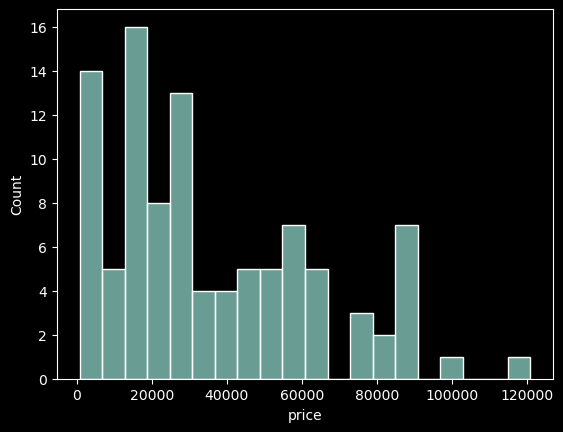

In [204]:
sns.histplot(parcel_aggr['price'],bins = 20)

In [205]:
parcel_aggr['price_bin'] = pd.cut(parcel_aggr['price'],10)

Let's divide the prices into groups and calculate their frequencies.

In [206]:
parcel_aggr.groupby('price_bin')['parcel_id'].count()

price_bin
(596.73, 12744.0]       19
(12744.0, 24771.0]      24
(24771.0, 36798.0]      17
(36798.0, 48825.0]       9
(48825.0, 60852.0]      12
(60852.0, 72879.0]       5
(72879.0, 84906.0]       5
(84906.0, 96933.0]       7
(96933.0, 108960.0]      1
(108960.0, 120987.0]     1
Name: parcel_id, dtype: int64

Descriptive statistics








In [207]:
parcel_aggr['price'].describe()

count       100.000000
mean      35979.190000
std       27887.128108
min         717.000000
25%       14253.750000
50%       26872.000000
75%       55929.750000
max      120987.000000
Name: price, dtype: float64

"Case when" in SQL typically refers to the CASE function or the CASE operator. It's a construct that allows for conditional operations in SQL queries.








As a final step, let's output a box plot to visualize our variable.







<Axes: xlabel='index_id', ylabel='price'>

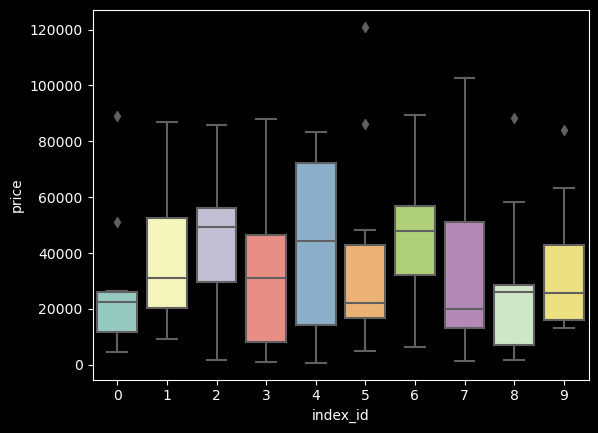

In [211]:
sns.boxplot(data=parcel_aggr, x='index_id', y='price')